In [33]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

tweets = pd.read_csv("tweetsds2bots_zeus.csv")
# tweets = tweets.head(100)
noOfTweet = tweets.shape[0]
print(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

385


total number:  385
positive number:  165
negative number:  123
neutral number:  97


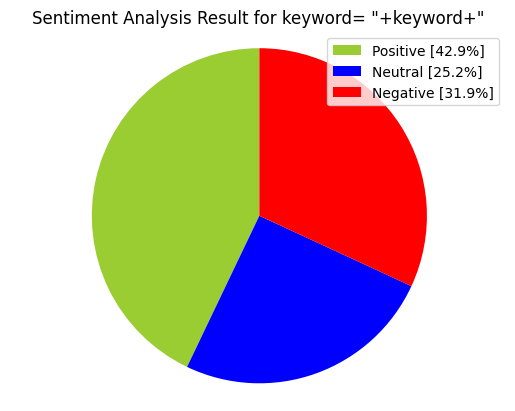

In [35]:
for index, tweet in tweets.iterrows():
    # print(tweet["retweet_text"])
    tweet_list.append(tweet["retweet_text"])
    analysis = TextBlob(tweet["retweet_text"])
    score = SentimentIntensityAnalyzer().polarity_scores(tweet["retweet_text"])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet["retweet_text"])
        negative += 1
    elif pos > neg:
        positive_list.append(tweet["retweet_text"])
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet["retweet_text"])
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= "+keyword+"' )
plt.axis('equal')
plt.show()

In [36]:
tweet_list.drop_duplicates(inplace = True)

In [37]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Vaccine Tracking is Now Here\n\nYou don't need...,Vaccine Tracking is Now Here\n\nYou don't need...
1,Biden/Harris America....\n\nLGBT Activist Call...,Biden/Harris America....\n\nLGBT Activist Call...
2,"CDC Issues New Guidelines, Launches Probe Afte...","CDC Issues New Guidelines, Launches Probe Afte..."
3,🚨👀👀🚨\n\nChief Medical Officer Says Canadians W...,🚨👀👀🚨\n\nChief Medical Officer Says Canadians W...
4,"5 Ways Americans Could Be ""Encouraged"" To Get ...","5 Ways Americans Could Be ""Encouraged"" To Get ..."
...,...,...
337,"According to a statistics expert, the probabil...","According to a statistics expert, the probabil..."
355,@GoJackFlynn https://t.co/ju8URLRCdU,@GoJackFlynn https://t.co/ju8URLRCdU
361,"🚨WARNING 🚨UK Warns People With ""Severe Allergi...","🚨WARNING 🚨UK Warns People With ""Severe Allergi..."
372,‘Those are real numbers!’ #Fauci clashes with ...,‘Those are real numbers!’ #Fauci clashes with ...


In [38]:
tweet_list

,0,text
0,Vaccine Tracking is Now Here\n\nYou don't need...,Vaccine Tracking is Now Here\n\nYou don't need...
1,Biden/Harris America....\n\nLGBT Activist Call...,Biden/Harris America....\n\nLGBT Activist Call...
2,"CDC Issues New Guidelines, Launches Probe Afte...","CDC Issues New Guidelines, Launches Probe Afte..."
3,🚨👀👀🚨\n\nChief Medical Officer Says Canadians W...,🚨👀👀🚨\n\nChief Medical Officer Says Canadians W...
4,"5 Ways Americans Could Be ""Encouraged"" To Get ...","5 Ways Americans Could Be ""Encouraged"" To Get ..."
...,...,...
337,"According to a statistics expert, the probabil...","According to a statistics expert, the probabil..."
355,@GoJackFlynn https://t.co/ju8URLRCdU,@GoJackFlynn https://t.co/ju8URLRCdU
361,"🚨WARNING 🚨UK Warns People With ""Severe Allergi...","🚨WARNING 🚨UK Warns People With ""Severe Allergi..."
372,‘Those are real numbers!’ #Fauci clashes with ...,‘Those are real numbers!’ #Fauci clashes with ...


In [39]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Vaccine Tracking is Now Here\n\nYou don't need...,vaccine tracking is now here you don t need d...
1,Biden/Harris America....\n\nLGBT Activist Call...,biden harris america lgbt activist calls ...
2,"CDC Issues New Guidelines, Launches Probe Afte...",cdc issues new guidelines launches probe afte...
3,🚨👀👀🚨\n\nChief Medical Officer Says Canadians W...,chief medical officer says canadians who...
4,"5 Ways Americans Could Be ""Encouraged"" To Get ...",5 ways americans could be encouraged to get ...
5,RT 🚨 \n\nBeyond a certain level the load is in...,rt beyond a certain level the load is insu...
6,Supreme Court Justice Alito Moves Up Deadline ...,supreme court justice alito moves up deadline ...
7,"""Big Win For Honest Elections"" - Judge Allows ...",big win for honest elections judge allows ...
8,"My County of Riverside, CA Sheriff needs to be...",my county of riverside ca sheriff needs to be...
9,Second Major California Sheriff Openly Rebels ...,second major california sheriff openly rebels ...


In [40]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Vaccine Tracking is Now Here\n\nYou don't need...,vaccine tracking is now here you don t need d...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,Biden/Harris America....\n\nLGBT Activist Call...,biden harris america lgbt activist calls ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,"CDC Issues New Guidelines, Launches Probe Afte...",cdc issues new guidelines launches probe afte...,-0.054545,0.318182,negative,0.103,0.897,0.000,-0.1531
3,🚨👀👀🚨\n\nChief Medical Officer Says Canadians W...,chief medical officer says canadians who...,0.000000,0.000000,positive,0.104,0.521,0.374,0.7717
4,"5 Ways Americans Could Be ""Encouraged"" To Get ...",5 ways americans could be encouraged to get ...,0.000000,0.000000,positive,0.000,0.800,0.200,0.3612
5,RT 🚨 \n\nBeyond a certain level the load is in...,rt beyond a certain level the load is insu...,0.313853,0.668591,positive,0.000,0.826,0.174,0.7906
6,Supreme Court Justice Alito Moves Up Deadline ...,supreme court justice alito moves up deadline ...,0.500000,0.500000,positive,0.000,0.557,0.443,0.9260
7,"""Big Win For Honest Elections"" - Judge Allows ...",big win for honest elections judge allows ...,0.466667,0.466667,positive,0.000,0.667,0.333,0.8750
8,"My County of Riverside, CA Sheriff needs to be...",my county of riverside ca sheriff needs to be...,0.000000,0.000000,positive,0.000,0.816,0.184,0.5574
9,Second Major California Sheriff Openly Rebels ...,second major california sheriff openly rebels ...,0.015625,0.250000,negative,0.048,0.952,0.000,-0.2023


In [41]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [42]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [43]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,55,46.22
positive,47,39.50
neutral,17,14.29


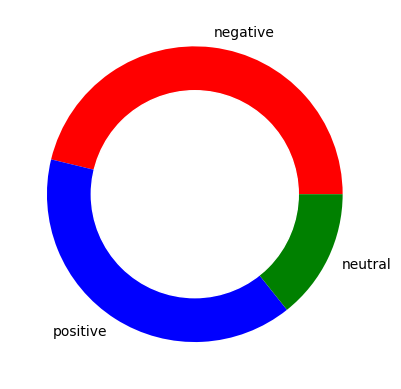

In [44]:

# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','blue','green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [45]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


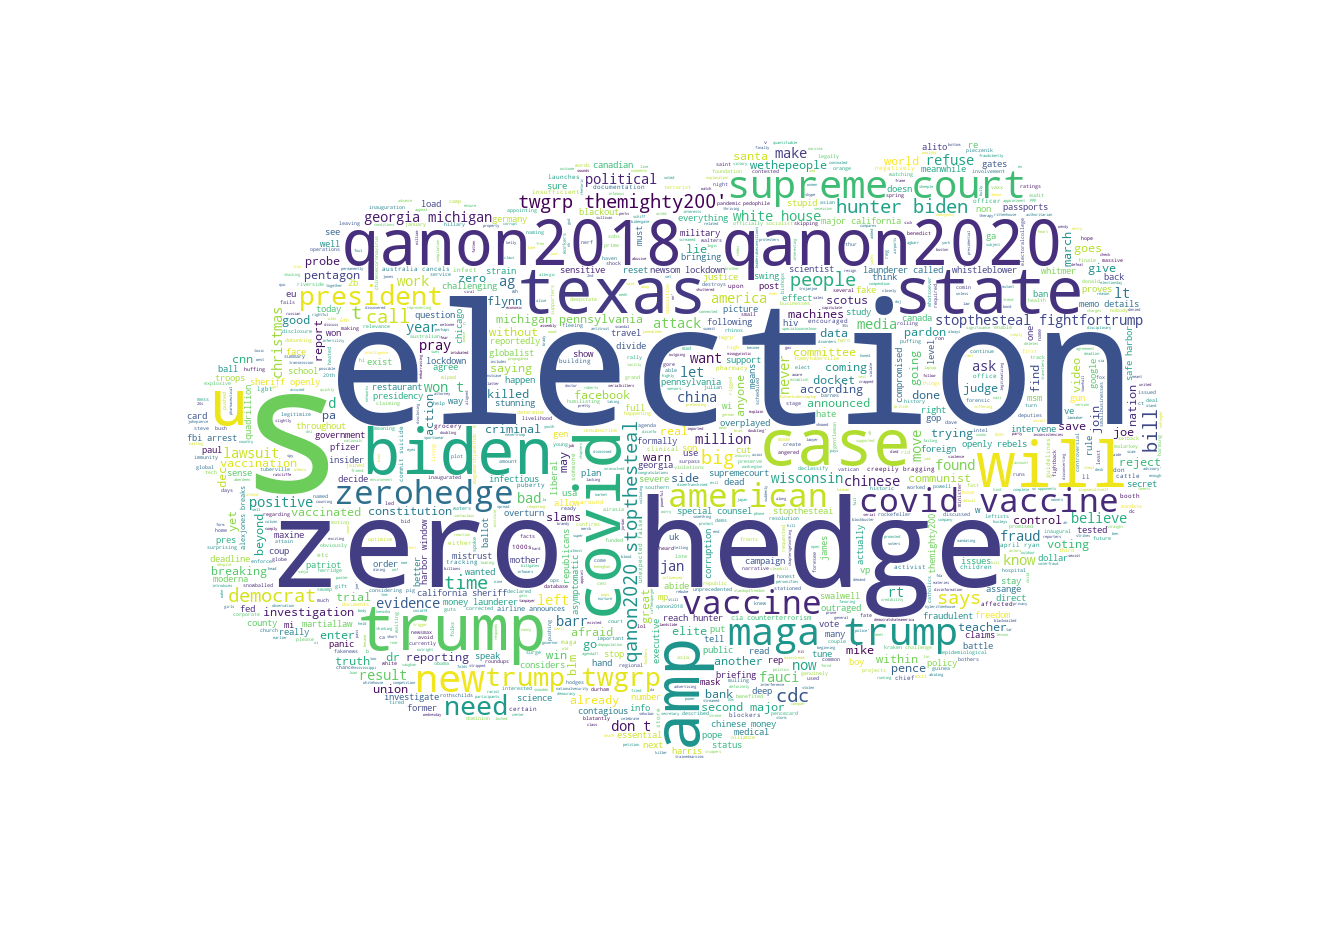

In [46]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


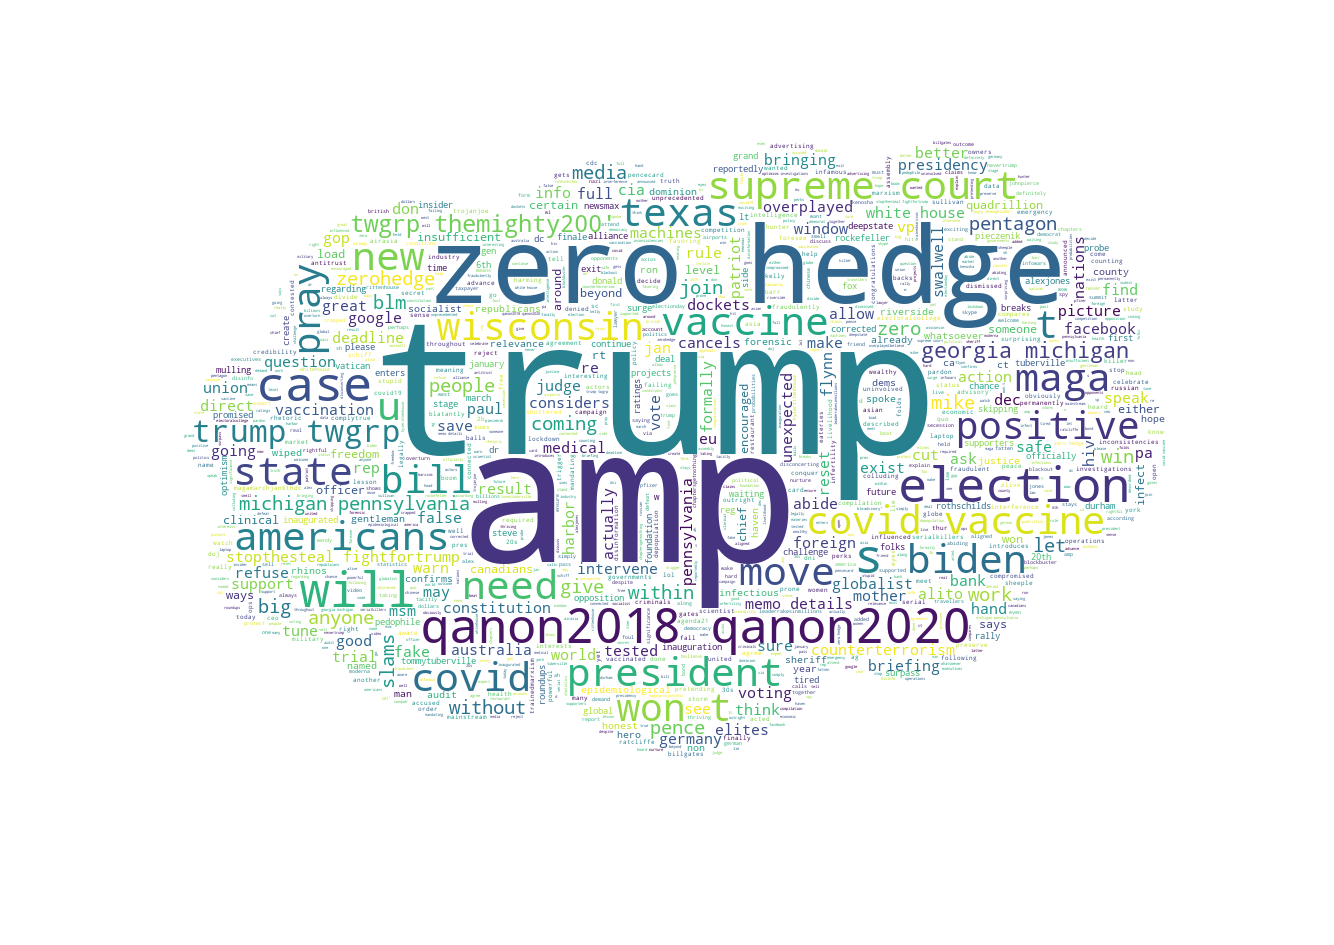

In [47]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


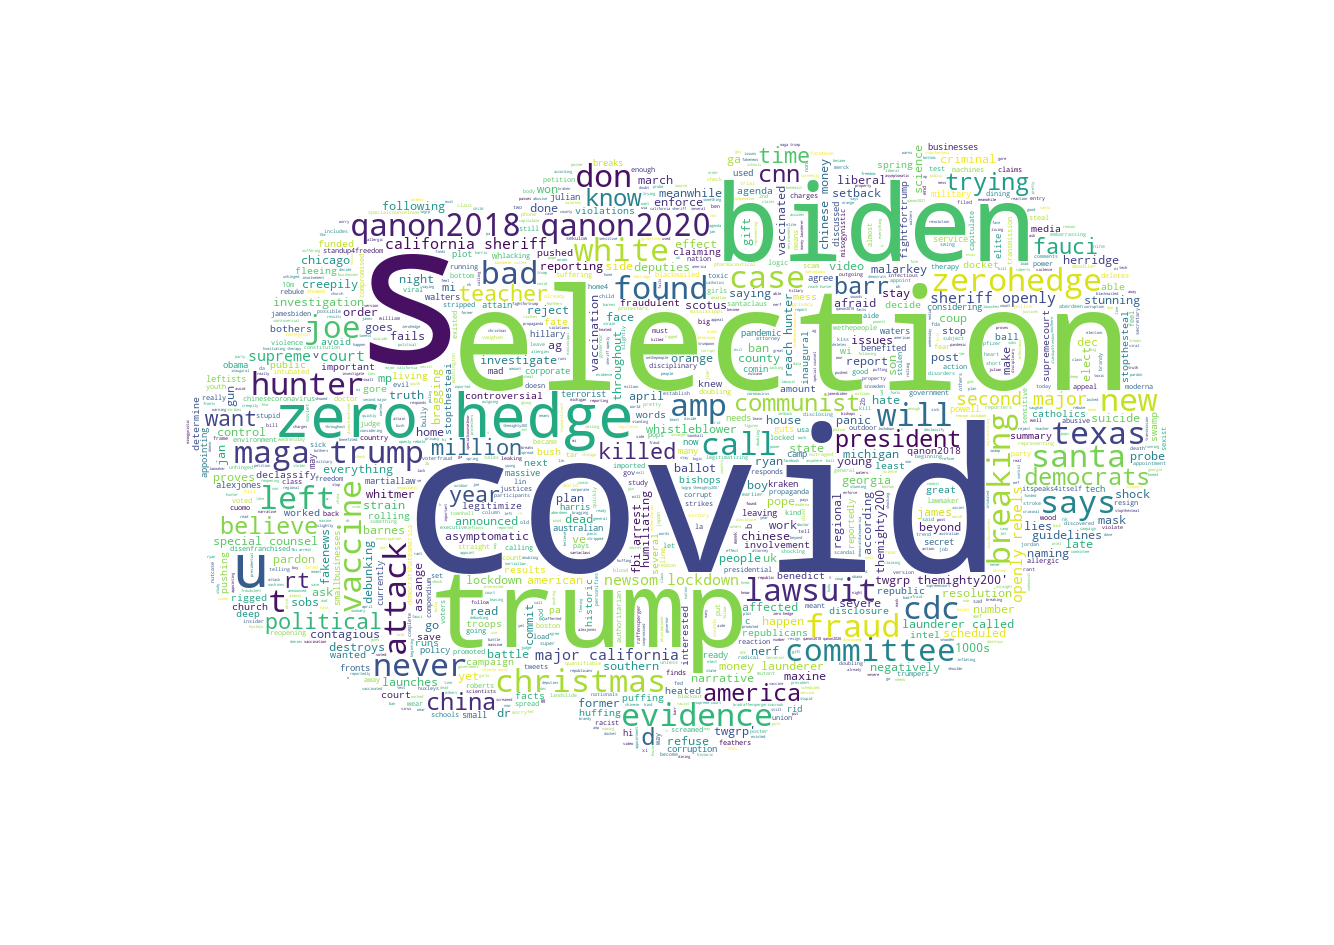

In [48]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


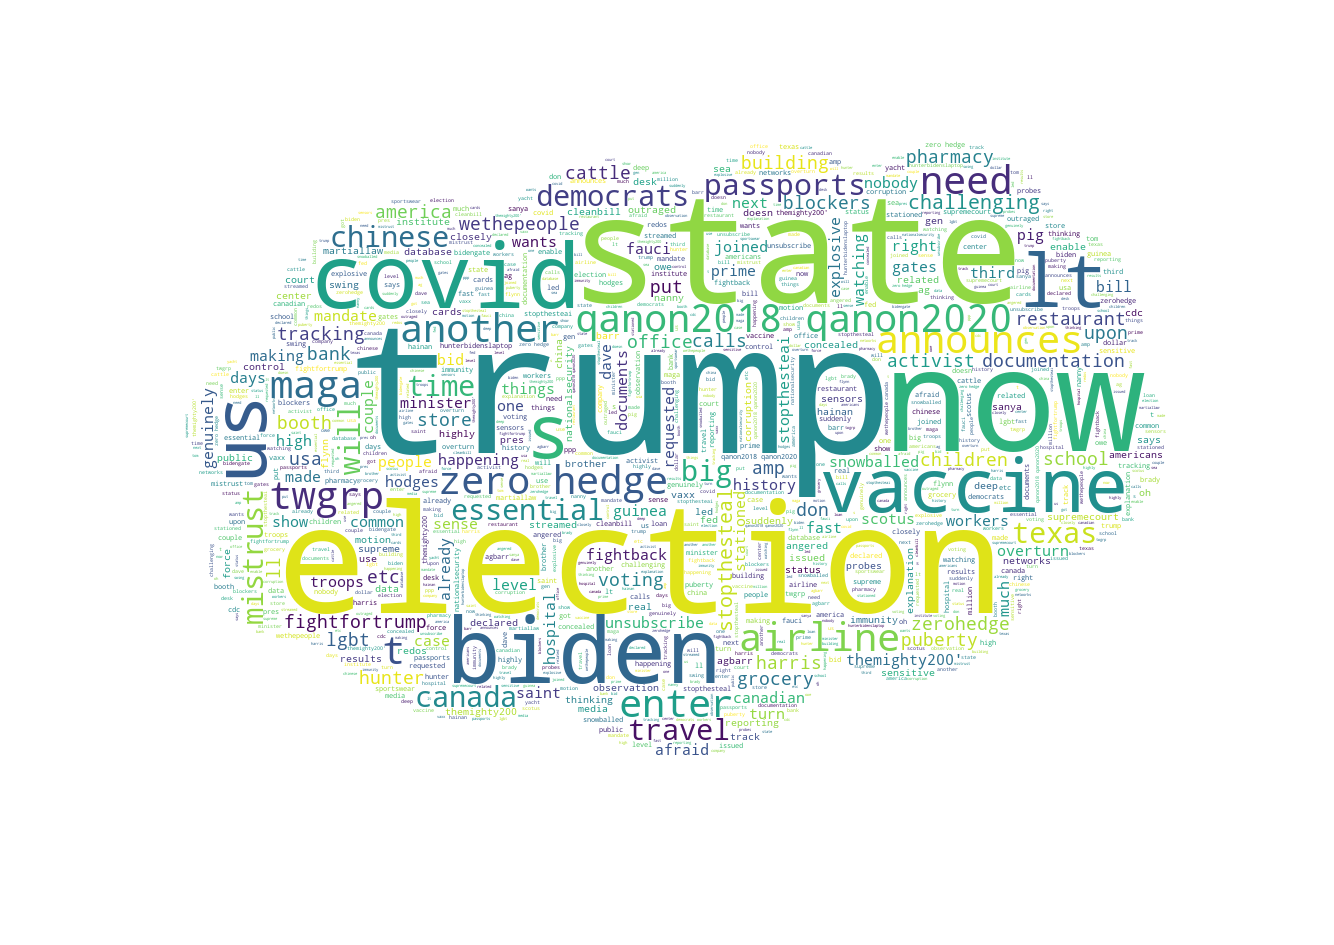

In [49]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [50]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [51]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,176.07
neutral,149.82
positive,186.28


In [52]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,26.95
neutral,22.65
positive,28.32


In [53]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [54]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [55]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [56]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [57]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [58]:
tw_list.head(100)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Vaccine Tracking is Now Here\n\nYou don't need...,vaccine tracking is now here you don t need d...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,244,44,vaccine tracking is now here you don t need d...,"[vaccine, tracking, is, now, here, you, don, t...","[vaccine, tracking, need, documentation, enter...","[vaccin, track, need, document, enter, usa, vo..."
1,Biden/Harris America....\n\nLGBT Activist Call...,biden harris america lgbt activist calls ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,131,19,biden harris america lgbt activist calls ...,"[biden, harris, america, lgbt, activist, calls...","[biden, harris, america, lgbt, activist, calls...","[biden, harri, america, lgbt, activist, call, ..."
2,"CDC Issues New Guidelines, Launches Probe Afte...",cdc issues new guidelines launches probe afte...,-0.054545,0.318182,negative,0.103,0.897,0.000,-0.1531,118,15,cdc issues new guidelines launches probe afte...,"[cdc, issues, new, guidelines, launches, probe...","[cdc, issues, new, guidelines, launches, probe...","[cdc, issu, new, guidelin, launch, probe, neg,..."
3,🚨👀👀🚨\n\nChief Medical Officer Says Canadians W...,chief medical officer says canadians who...,0.000000,0.000000,positive,0.104,0.521,0.374,0.7717,101,15,chief medical officer says canadians who...,"[, chief, medical, officer, says, canadians, w...","[, chief, medical, officer, says, canadians, r...","[, chief, medic, offic, say, canadian, refus, ..."
4,"5 Ways Americans Could Be ""Encouraged"" To Get ...",5 ways americans could be encouraged to get ...,0.000000,0.000000,positive,0.000,0.800,0.200,0.3612,76,13,ways americans could be encouraged to get a...,"[, ways, americans, could, be, encouraged, to,...","[, ways, americans, could, encouraged, get, co...","[, way, american, could, encourag, get, covid,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,"https://t.co/UzVy8F3VIv\n(""Vaccine Whistleblow...",vaccine whistleblower found dead after say...,-0.025000,0.275000,negative,0.152,0.760,0.088,-0.3814,224,35,vaccine whistleblower found dead after say...,"[, vaccine, whistleblower, found, dead, after,...","[, vaccine, whistleblower, found, dead, saying...","[, vaccin, whistleblow, found, dead, say, neve..."
208,Japan issues complete ban on Non-Nationals ent...,japan issues complete ban on non nationals ent...,0.216667,0.533333,negative,0.365,0.443,0.192,-0.3612,85,13,japan issues complete ban on non nationals ent...,"[japan, issues, complete, ban, on, non, nation...","[japan, issues, complete, ban, non, nationals,...","[japan, issu, complet, ban, non, nation, entri..."
233,@SpeakerPelosi @senatemajldr \nGet a #CleanBil...,get a cleanbill on the desk now weth...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,68,11,get a cleanbill on the desk now weth...,"[, get, a, cleanbill, on, the, desk, now, weth...","[, get, cleanbill, desk, wethepeople, fed, ]","[, get, cleanbil, desk, wethepeopl, fed, ]"
235,Does anyone else find this disconcerting?\nWe ...,does anyone else find this disconcerting we d...,0.000000,0.500000,positive,0.000,0.828,0.172,0.7845,247,42,does anyone else find this disconcerting we d...,"[does, anyone, else, find, this, disconcerting...","[anyone, else, find, disconcerting, definitely...","[anyon, els, find, disconcert, definit, need, ..."


In [59]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

119 Number of reviews has 1039 words


In [60]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aberdeen,abid,abl,abus,accord,account,accus,act,action,...,wow,xi,yacht,year,yet,york,young,youth,zero,zerohedg
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
qanon,50
trump,39
covid,32
zero,28
elect,26
vaccin,25
hedg,25
amp,23
biden,21
us,15


In [62]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [63]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('zero hedge', 25),
 ('qanon2018 qanon2020', 24),
 ('supreme court', 12),
 ('maga trump', 10),
 ('trump twgrp', 9),
 ('twgrp themighty200', 9),
 ('covid 19', 8),
 ('covid vaccine', 8),
 ('hunter biden', 7),
 ('qanon2020 stopthesteal', 6),
 ('stopthesteal fightfortrump', 6),
 ('texas election', 5),
 ('white house', 5),
 ('ag barr', 4),
 ('georgia michigan', 4),
 ('michigan pennsylvania', 4),
 ('pennsylvania wisconsin', 4),
 ('000 000', 4),
 ('vaccine zero', 3),
 ('second major', 3)]

In [64]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('maga trump twgrp', 9),
 ('trump twgrp themighty200', 9),
 ('qanon2018 qanon2020 stopthesteal', 6),
 ('qanon2020 stopthesteal fightfortrump', 6),
 ('georgia michigan pennsylvania', 4),
 ('michigan pennsylvania wisconsin', 4),
 ('vaccine zero hedge', 3),
 ('second major california', 3),
 ('major california sheriff', 3),
 ('california sheriff openly', 3),
 ('sheriff openly rebels', 3),
 ('openly rebels newsom', 3),
 ('rebels newsom lockdown', 3),
 ('chinese money launderer', 3),
 ('money launderer called', 3),
 ('fbi arrest trying', 3),
 ('arrest trying reach', 3),
 ('trying reach hunter', 3),
 ('texas election lawsuit', 3),
 ('reporting hunter biden', 3)]